In [1]:
import tensorflow as tf; print(tf.__version__)

1.10.1


In [1]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{'dry': ['input/dry/1367731996.CSV',
  'input/dry/1088131773.CSV',
  'input/dry/1948652171.CSV',
  'input/dry/891085006.CSV',
  'input/dry/957252430.CSV',
  'input/dry/1910189788.CSV',
  'input/dry/530759577.CSV',
  'input/dry/1344943899.CSV',
  'input/dry/78520028.CSV',
  'input/dry/1868903662.CSV',
  'input/dry/1780329192.CSV',
  'input/dry/1833935907.CSV',
  'input/dry/486296532.CSV',
  'input/dry/1610930929.CSV',
  'input/dry/1597231826.CSV',
  'input/dry/213951127.CSV',
  'input/dry/143521040.CSV',
  'input/dry/150254099.CSV',
  'input/dry/954500386.CSV',
  'input/dry/2083478664.CSV',
  'input/dry/1689595608.CSV',
  'input/dry/1816589245.CSV',
  'input/dry/1289876659.CSV',
  'input/dry/1357645682.CSV',
  'input/dry/1439407403.CSV',
  'input/dry/1894789.CSV',
  'input/dry/1794072841.CSV',
  'input/dry/1573713973.CSV',
  'input/dry/822335360.CSV',
  'input/dry/1891882976.CSV',
  'input/dry/1409536457.CSV',
  'input/dry/1361302372.CSV',
  'input/dry/1325834487.CSV',
  'input/dry/4151

In [2]:
#Read in CSV files
import pandas as pd
import numpy as np

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #Add flipped data
        flip_0 = np.flip(df.values[0].reshape((8,8)), 0)
        flip_0_1 = np.flip(flip_0, 1)
        data.append(flip_0.reshape(64))
        data.append(flip_0_1.reshape(64))
        flip_1 = np.flip(df.values[0].reshape((8,8)), 1)
        data.append(flip_1.reshape(64))
        #create noisy data
        noise_level = 0.2
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        noise_level = 0.5
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        #add labels - for original and flipped
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
    #add label name    
    label_names.append(key)
    #count numver of classes
    index += 1



In [3]:
np.random.normal(-0.2, 0.2, df.values[0].shape)


array([-0.32123458,  0.15056146, -0.0231666 , -0.08616161, -0.23106955,
       -0.00228104, -0.29160309, -0.16753302, -0.08453636, -0.21027172,
       -0.16420728, -0.49853282, -0.25195464, -0.13089915, -0.40700202,
        0.1272705 , -0.01097343, -0.3367345 ,  0.0673438 , -0.43633346,
        0.08562323, -0.18079196, -0.20822065, -0.42993556, -0.16063495,
       -0.03051351, -0.23817342, -0.13107172, -0.38225321, -0.34589565,
       -0.0974143 , -0.16270065, -0.17721527, -0.35563576, -0.09278678,
       -0.72909171, -0.06335732, -0.2316531 , -0.15387122, -0.09453504,
        0.02477413,  0.22808613, -0.30781117, -0.18656788, -0.62571206,
       -0.19598205,  0.03949447,  0.01244312,  0.05159579, -0.10563346,
       -0.31064773, -0.07417612, -0.27680168,  0.10475366,  0.24361464,
       -0.02786504, -0.30529929, -0.03331498, -0.43453821, -0.45005049,
       -0.0215006 ,  0.11141439, -0.15149355, -0.56225553])

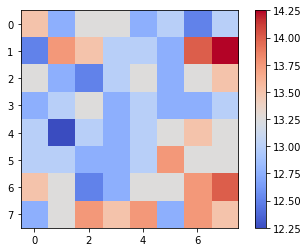

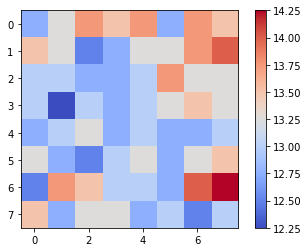

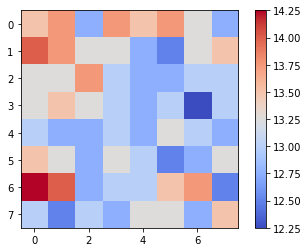

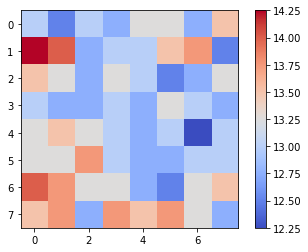

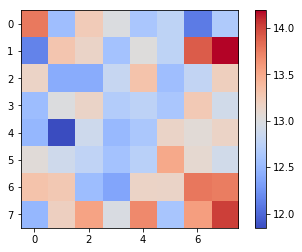

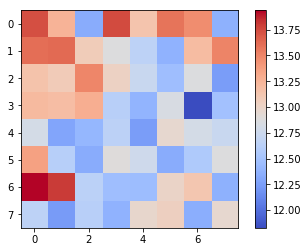

In [4]:
#Print test images
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(6):
    plt.imshow(data[i].reshape((8,8)), cmap='coolwarm')
    plt.colorbar()
    plt.show()

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,19.5,19.25,20.5,20.0,19.5,20.0,19.75,19.5,19.75,19.75,...,18.25,18.5,19.25,20.0,20.0,18.75,18.75,18.25,18.25,18.75


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [7]:
print(data.shape)
data

(3264, 64)


array([[0.28888557, 0.24886279, 0.32360576, ..., 0.25456628, 0.29823307,
        0.32239654],
       [0.23122764, 0.28812961, 0.36118321, ..., 0.27418295, 0.19503205,
        0.28576933],
       [0.28888557, 0.32739643, 0.2860283 , ..., 0.29379963, 0.21567225,
        0.32239654],
       ...,
       [0.67183304, 0.65644237, 0.64619694, ..., 0.80503104, 0.67279417,
        0.74199483],
       [0.73092967, 0.81823168, 0.83090144, ..., 0.82344991, 0.79359796,
        0.76192311],
       [0.75014898, 0.79859827, 0.83090144, ..., 0.82344991, 0.81423816,
        0.7436095 ]])

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



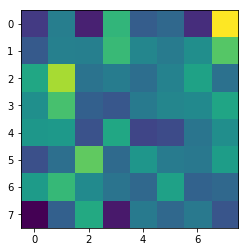

In [9]:
img = X_train[0].reshape((8,8))
img = np.flip(img, 0)
plt.imshow(img)

In [10]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = index
resnet_weights_path = filePath + '/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(Dropout(0.05));
# model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.05));
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.025));
# model.add(Dense(4, activation='relu'))
#model.add(Dropout(0.025));
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2));
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# model.layers[0].trainable = False

In [11]:
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

#data
model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        validation_steps=1,
        steps_per_epoch=5000,
        epochs=1000,
        callbacks=[tensorboard])


Epoch 1/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.4130 - acc: 0.8153 - val_loss: 0.3023 - val_acc: 0.8776
Epoch 2/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2908 - acc: 0.8767 - val_loss: 0.2611 - val_acc: 0.9041
Epoch 3/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2620 - acc: 0.8884 - val_loss: 0.2533 - val_acc: 0.9041
Epoch 4/1000
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2448 - acc: 0.8962 - val_loss: 0.2347 - val_acc: 0.9102
Epoch 5/1000
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2314 - acc: 0.9029 - val_loss: 0.2323 - val_acc: 0.9092
Epoch 6/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2217 - acc: 0.9075 - val_loss: 0.2350 - val_acc: 0.9061
Epoch 7/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2137 - acc: 0.9115 - val_loss: 0.2464 - val_acc: 0.9061
Epoch 8/1000
5000/5000 [=================

5000/5000 [==============================] - 15s 3ms/step - loss: 0.1769 - acc: 0.9301 - val_loss: 0.2515 - val_acc: 0.9143
Epoch 120/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1769 - acc: 0.9301 - val_loss: 0.2437 - val_acc: 0.9092
Epoch 121/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1769 - acc: 0.9300 - val_loss: 0.2410 - val_acc: 0.9173
Epoch 122/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1768 - acc: 0.9301 - val_loss: 0.2404 - val_acc: 0.9153
Epoch 123/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1770 - acc: 0.9299 - val_loss: 0.2416 - val_acc: 0.9122
Epoch 124/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1769 - acc: 0.9301 - val_loss: 0.2428 - val_acc: 0.9184
Epoch 125/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1766 - acc: 0.9301 - val_loss: 0.2383 - val_acc: 0.9143
Epoch 126/1000
5000/5000 [================

5000/5000 [==============================] - 15s 3ms/step - loss: 0.1744 - acc: 0.9312 - val_loss: 0.2426 - val_acc: 0.9163
Epoch 179/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1745 - acc: 0.9312 - val_loss: 0.2412 - val_acc: 0.9112
Epoch 180/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1746 - acc: 0.9312 - val_loss: 0.2453 - val_acc: 0.9122
Epoch 181/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1745 - acc: 0.9311 - val_loss: 0.2404 - val_acc: 0.9173
Epoch 182/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1745 - acc: 0.9311 - val_loss: 0.2414 - val_acc: 0.9153
Epoch 183/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1746 - acc: 0.9311 - val_loss: 0.2462 - val_acc: 0.9153
Epoch 184/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1744 - acc: 0.9312 - val_loss: 0.2459 - val_acc: 0.9122
Epoch 185/1000
5000/5000 [================

5000/5000 [==============================] - 15s 3ms/step - loss: 0.1742 - acc: 0.9313 - val_loss: 0.2458 - val_acc: 0.9184
Epoch 238/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1740 - acc: 0.9313 - val_loss: 0.2437 - val_acc: 0.9163
Epoch 239/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1738 - acc: 0.9314 - val_loss: 0.2382 - val_acc: 0.9204
Epoch 240/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1738 - acc: 0.9314 - val_loss: 0.2433 - val_acc: 0.9133
Epoch 241/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1742 - acc: 0.9313 - val_loss: 0.2418 - val_acc: 0.9153
Epoch 242/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1741 - acc: 0.9313 - val_loss: 0.2465 - val_acc: 0.9153
Epoch 243/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1740 - acc: 0.9314 - val_loss: 0.2474 - val_acc: 0.9143
Epoch 244/1000
5000/5000 [================

5000/5000 [==============================] - 15s 3ms/step - loss: 0.1737 - acc: 0.9315 - val_loss: 0.2400 - val_acc: 0.9153
Epoch 297/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1739 - acc: 0.9314 - val_loss: 0.2502 - val_acc: 0.9153
Epoch 298/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1737 - acc: 0.9315 - val_loss: 0.2467 - val_acc: 0.9143
Epoch 299/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1739 - acc: 0.9314 - val_loss: 0.2438 - val_acc: 0.9173
Epoch 300/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1740 - acc: 0.9314 - val_loss: 0.2470 - val_acc: 0.9153
Epoch 301/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1740 - acc: 0.9314 - val_loss: 0.2421 - val_acc: 0.9173
Epoch 302/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1739 - acc: 0.9315 - val_loss: 0.2378 - val_acc: 0.9204
Epoch 303/1000
5000/5000 [================

5000/5000 [==============================] - 15s 3ms/step - loss: 0.1735 - acc: 0.9316 - val_loss: 0.2469 - val_acc: 0.9082
Epoch 356/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1735 - acc: 0.9317 - val_loss: 0.2485 - val_acc: 0.9112
Epoch 357/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1734 - acc: 0.9317 - val_loss: 0.2447 - val_acc: 0.9204
Epoch 358/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1736 - acc: 0.9315 - val_loss: 0.2450 - val_acc: 0.9184
Epoch 359/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1735 - acc: 0.9316 - val_loss: 0.2548 - val_acc: 0.9173
Epoch 360/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1734 - acc: 0.9317 - val_loss: 0.2489 - val_acc: 0.9173
Epoch 361/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1735 - acc: 0.9316 - val_loss: 0.2480 - val_acc: 0.9153
Epoch 362/1000
5000/5000 [================

5000/5000 [==============================] - 16s 3ms/step - loss: 0.1736 - acc: 0.9316 - val_loss: 0.2446 - val_acc: 0.9173
Epoch 415/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1734 - acc: 0.9317 - val_loss: 0.2464 - val_acc: 0.9194
Epoch 416/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1736 - acc: 0.9316 - val_loss: 0.2448 - val_acc: 0.9173
Epoch 417/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1735 - acc: 0.9315 - val_loss: 0.2502 - val_acc: 0.9173
Epoch 418/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1734 - acc: 0.9318 - val_loss: 0.2517 - val_acc: 0.9133
Epoch 419/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1735 - acc: 0.9316 - val_loss: 0.2528 - val_acc: 0.9194
Epoch 420/1000
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1734 - acc: 0.9317 - val_loss: 0.2487 - val_acc: 0.9194
Epoch 421/1000
5000/5000 [================

5000/5000 [==============================] - 15s 3ms/step - loss: 0.1733 - acc: 0.9316 - val_loss: 0.2534 - val_acc: 0.9163
Epoch 474/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1733 - acc: 0.9317 - val_loss: 0.2477 - val_acc: 0.9153
Epoch 475/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1733 - acc: 0.9317 - val_loss: 0.2529 - val_acc: 0.9153
Epoch 476/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1731 - acc: 0.9318 - val_loss: 0.2490 - val_acc: 0.9143
Epoch 477/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.2545 - val_acc: 0.9092
Epoch 478/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1733 - acc: 0.9318 - val_loss: 0.2498 - val_acc: 0.9173
Epoch 479/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.2503 - val_acc: 0.9173
Epoch 480/1000
5000/5000 [================

Epoch 591/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1731 - acc: 0.9318 - val_loss: 0.2486 - val_acc: 0.9173
Epoch 592/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1731 - acc: 0.9317 - val_loss: 0.2566 - val_acc: 0.9143
Epoch 593/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1730 - acc: 0.9317 - val_loss: 0.2437 - val_acc: 0.9173
Epoch 594/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1732 - acc: 0.9317 - val_loss: 0.2446 - val_acc: 0.9133
Epoch 595/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1731 - acc: 0.9318 - val_loss: 0.2501 - val_acc: 0.9153
Epoch 596/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1734 - acc: 0.9317 - val_loss: 0.2448 - val_acc: 0.9194
Epoch 597/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2432 - val_acc: 0.9173
Epoch 598/1000
5000/5000 [=

Epoch 650/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1731 - acc: 0.9318 - val_loss: 0.2528 - val_acc: 0.9153
Epoch 651/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.2516 - val_acc: 0.9173
Epoch 652/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2510 - val_acc: 0.9194
Epoch 653/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1731 - acc: 0.9317 - val_loss: 0.2494 - val_acc: 0.9133
Epoch 654/1000
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1731 - acc: 0.9318 - val_loss: 0.2480 - val_acc: 0.9194
Epoch 655/1000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2475 - val_acc: 0.9184
Epoch 656/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.2514 - val_acc: 0.9173
Epoch 657/1000
5000/5000 [=

Epoch 709/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1728 - acc: 0.9320 - val_loss: 0.2461 - val_acc: 0.9173
Epoch 710/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2513 - val_acc: 0.9163
Epoch 711/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1728 - acc: 0.9319 - val_loss: 0.2481 - val_acc: 0.9173
Epoch 712/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2548 - val_acc: 0.9163
Epoch 713/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1730 - acc: 0.9319 - val_loss: 0.2433 - val_acc: 0.9153
Epoch 714/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1731 - acc: 0.9318 - val_loss: 0.2508 - val_acc: 0.9184
Epoch 715/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.2489 - val_acc: 0.9143
Epoch 716/1000
5000/5000 [=

Epoch 768/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1730 - acc: 0.9319 - val_loss: 0.2495 - val_acc: 0.9184
Epoch 769/1000
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.2445 - val_acc: 0.9204
Epoch 770/1000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1727 - acc: 0.9320 - val_loss: 0.2538 - val_acc: 0.9163
Epoch 771/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2469 - val_acc: 0.9133
Epoch 772/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1730 - acc: 0.9319 - val_loss: 0.2515 - val_acc: 0.9184
Epoch 773/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.2503 - val_acc: 0.9112
Epoch 774/1000
5000/5000 [==============================] - 15s 3ms/step - loss: 0.1730 - acc: 0.9319 - val_loss: 0.2441 - val_acc: 0.9184
Epoch 775/1000
5000/5000 [=

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test, y_test))
print(model.evaluate(X_train, y_train))


In [ ]:
import matplotlib.pyplot as plt


for i in range (0,11):
    image = X_test[i]
    pred = model.predict(X_test[i:i+1])
    
    plt.imshow(image.reshape((8,8)), cmap='coolwarm')
    plt.colorbar()
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 


In [ ]:
#Save the model
model.save("test_model.h5");